# Analysis of SQuAD 1.0 dataset

In [1]:
from question_answering.paths import extractive_qa_paths
from question_answering.utils import core_qa_utils
from transformers import AutoTokenizer

C:\Users\Karol\miniconda3\envs\question_answering\lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
raw_train_dataset, raw_test_dataset = core_qa_utils.load_datasets_from_json(
    dataset_path=extractive_qa_paths.squad1_dataset_dir,
    filenames=["original_train.json", "original_test.json"],
)

In [3]:
train_dataset = raw_train_dataset.select(range(80000))
val_dataset = raw_train_dataset.select(range(80000, 87599))
test_dataset = raw_test_dataset

## Maximum number of tokens in any sample across dataset

In [5]:
def tokenize_sample(sample, tokenizer, max_tokens=None, padding=False):
    question = sample["question"].strip()
    context = sample["context"].strip()

    return tokenizer(question, context, max_length=max_tokens, padding=padding)

#### BERT uncased

In [8]:
bert_uncased_tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")

In [12]:
tokenized_train_dataset = train_dataset.map(
    lambda row: tokenize_sample(row, bert_uncased_tokenizer)
)
tokenized_val_dataset = val_dataset.map(
    lambda row: tokenize_sample(row, bert_uncased_tokenizer)
)
tokenized_test_dataset = test_dataset.map(
    lambda row: tokenize_sample(row, bert_uncased_tokenizer)
)

In [16]:
max_bert_uncased_train_tokens = len(max(tokenized_train_dataset["input_ids"], key=len))
max_bert_uncased_val_tokens = len(max(tokenized_val_dataset["input_ids"], key=len))
max_bert_uncased_test_tokens = len(max(tokenized_test_dataset["input_ids"], key=len))
max_bert_uncased_tokens = max(
    max_bert_uncased_train_tokens,
    max_bert_uncased_val_tokens,
    max_bert_uncased_test_tokens,
)

print(
    f"Max number of tokens in tokenized train dataset: {max_bert_uncased_train_tokens}"
)
print(f"Max number of tokens in tokenized val dataset: {max_bert_uncased_val_tokens}")
print(f"Max number of tokens in tokenized test dataset: {max_bert_uncased_test_tokens}")
print(f"Max number of tokens overall: {max_bert_uncased_tokens}")

#### BERT cased

In [19]:
bert_cased_tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-cased")

In [20]:
tokenized_train_dataset = train_dataset.map(
    lambda row: tokenize_sample(row, bert_cased_tokenizer)
)
tokenized_val_dataset = val_dataset.map(
    lambda row: tokenize_sample(row, bert_cased_tokenizer)
)
tokenized_test_dataset = test_dataset.map(
    lambda row: tokenize_sample(row, bert_cased_tokenizer)
)

In [21]:
max_bert_cased_train_tokens = len(max(tokenized_train_dataset["input_ids"], key=len))
max_bert_cased_val_tokens = len(max(tokenized_val_dataset["input_ids"], key=len))
max_bert_cased_test_tokens = len(max(tokenized_test_dataset["input_ids"], key=len))
max_bert_cased_tokens = max(
    max_bert_cased_train_tokens, max_bert_cased_val_tokens, max_bert_cased_test_tokens
)

print(f"Max number of tokens in tokenized train dataset: {max_bert_cased_train_tokens}")
print(f"Max number of tokens in tokenized val dataset: {max_bert_cased_val_tokens}")
print(f"Max number of tokens in tokenized test dataset: {max_bert_cased_test_tokens}")
print(f"Max number of tokens overall: {max_bert_cased_tokens}")

#### ALBERT cased

In [22]:
albert_cased_tokenizer = AutoTokenizer.from_pretrained("albert/albert-base-v2")

In [23]:
tokenized_train_dataset = train_dataset.map(
    lambda row: tokenize_sample(row, albert_cased_tokenizer)
)
tokenized_val_dataset = val_dataset.map(
    lambda row: tokenize_sample(row, albert_cased_tokenizer)
)
tokenized_test_dataset = test_dataset.map(
    lambda row: tokenize_sample(row, albert_cased_tokenizer)
)

In [24]:
max_albert_cased_train_tokens = len(max(tokenized_train_dataset["input_ids"], key=len))
max_albert_cased_val_tokens = len(max(tokenized_val_dataset["input_ids"], key=len))
max_albert_cased_test_tokens = len(max(tokenized_test_dataset["input_ids"], key=len))
max_albert_cased_tokens = max(
    max_albert_cased_train_tokens,
    max_albert_cased_val_tokens,
    max_albert_cased_test_tokens,
)

print(
    f"Max number of tokens in tokenized train dataset: {max_albert_cased_train_tokens}"
)
print(f"Max number of tokens in tokenized val dataset: {max_albert_cased_val_tokens}")
print(f"Max number of tokens in tokenized test dataset: {max_albert_cased_test_tokens}")
print(f"Max number of tokens overall: {max_albert_cased_tokens}")

## Data samples structure

#### Train sample

In [5]:
train_sample = val_dataset[0]

In [7]:
train_sample

#### Test sample

In [8]:
train_sample = test_dataset[0]

In [9]:
train_sample

## Answers

In [52]:
import matplotlib.pyplot as plt
from collections import Counter
from question_answering.paths import extractive_qa_paths
from question_answering.utils.__helpers import create_dirs_if_not_exists
import seaborn

In [44]:
answers = test_dataset['answer_text']
length = len(answers)
answer_lengths = sorted([len(answer) for answer in answers])

In [45]:
frequency = Counter(answer_lengths)

In [46]:
frequency

Counter({3: 8490, 5: 1147, 4: 759, 2: 136, 6: 35, 1: 3})

In [47]:
frequency_dict = {
    # '6': 35,
    '5 answers': 1147 / length,
    '4 answers': 759 / length,
    '3 answers': 8490 / length,
    '2 answers': 136 / length,
    # '1': 3,
}

In [48]:
values = list(frequency_dict.values())
labels = frequency_dict.keys()
figure_path = extractive_qa_paths.general_figures_dir / 'squad1_test_dataset_answer_length_distribution.png'

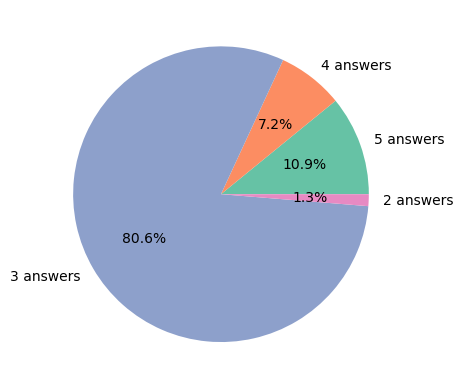

In [58]:
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=seaborn.color_palette('Set2'))
create_dirs_if_not_exists(figure_path.parent)
plt.savefig(figure_path)

## Sentence lengths histograms

In [59]:
contexts = train_dataset['context'] + val_dataset['context'] + test_dataset['context']

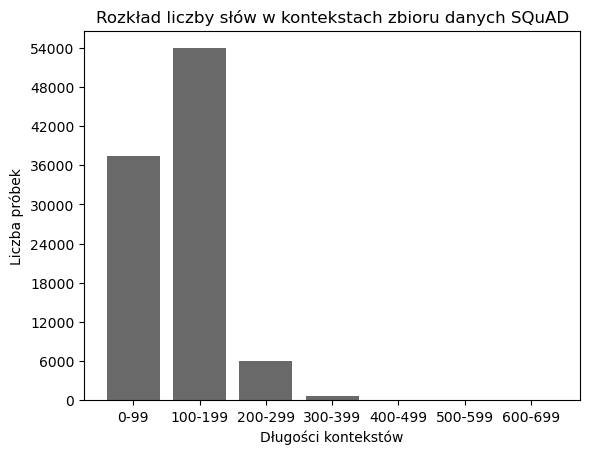

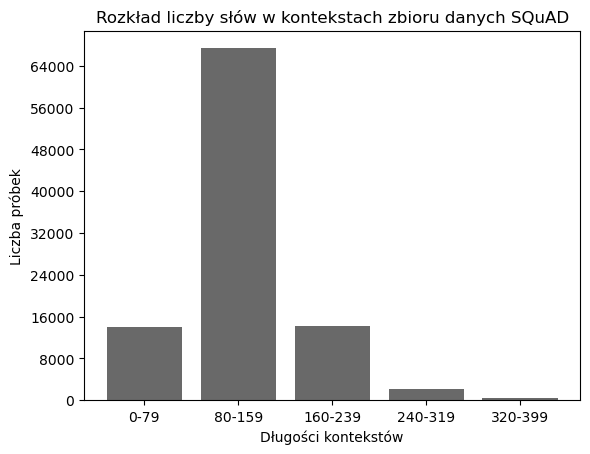

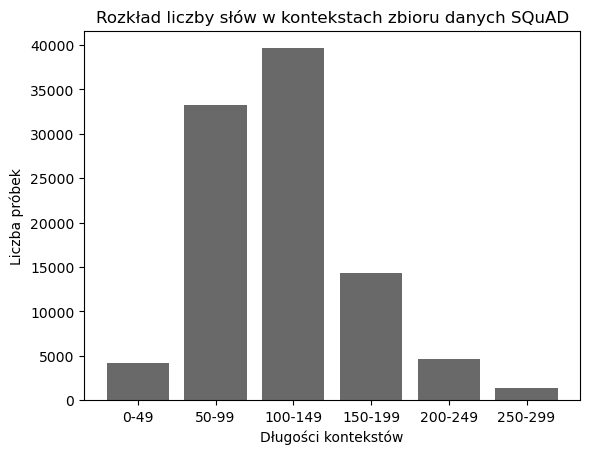

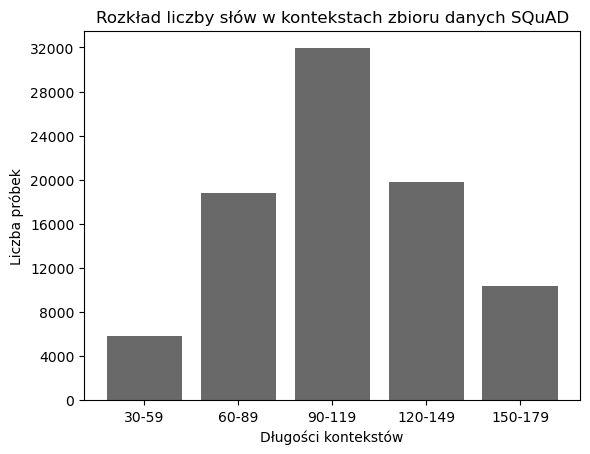

In [64]:
# Plot number of words in context sentences depending on range for the training set
core_qa_utils.plot_sentence_lengths_histogram(
    sentences=contexts,
    figure_path=extractive_qa_paths.general_figures_dir
                / "squad_context_sentence_lengths_histogram_0_700_100.png",
    figure_title="Rozkład liczby słów w kontekstach zbioru danych SQuAD",
    min_threshold=0,
    max_threshold=700,
    divider=100,
    x_label="Długości kontekstów",
    y_label="Liczba próbek"
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=contexts,
    figure_path=extractive_qa_paths.general_figures_dir
                / "squad_context_sentence_lengths_histogram_0_400_80.png",
    figure_title="Rozkład liczby słów w kontekstach zbioru danych SQuAD",
    min_threshold=0,
    max_threshold=400,
    divider=80,
    x_label="Długości kontekstów",
    y_label="Liczba próbek"
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=contexts,
    figure_path=extractive_qa_paths.general_figures_dir
                / "squad_context_sentence_lengths_histogram_0_300_50.png",
    figure_title="Rozkład liczby słów w kontekstach zbioru danych SQuAD",
    min_threshold=0,
    max_threshold=300,
    divider=50,
    x_label="Długości kontekstów",
    y_label="Liczba próbek"
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=contexts,
    figure_path=extractive_qa_paths.general_figures_dir
                / "squad_context_sentence_lengths_histogram_30_180_30.png",
    figure_title="Rozkład liczby słów w kontekstach zbioru danych SQuAD",
    min_threshold=30,
    max_threshold=180,
    divider=30,
    x_label="Długości kontekstów",
    y_label="Liczba próbek"
)

In [67]:
questions = train_dataset['question'] + val_dataset['question'] + test_dataset['question']

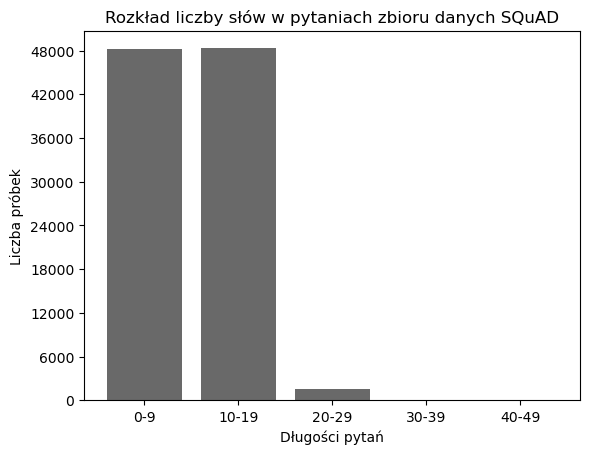

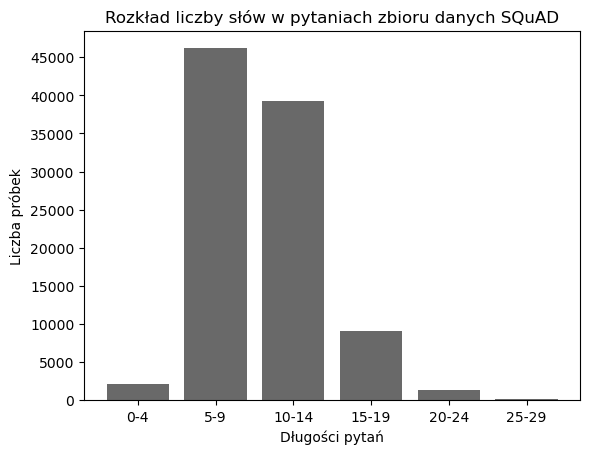

In [68]:
# Plot number of words in context sentences depending on range for the training set
core_qa_utils.plot_sentence_lengths_histogram(
    sentences=questions,
    figure_path=extractive_qa_paths.general_figures_dir
                / "squad_question_sentence_lengths_histogram_0_50_10.png",
    figure_title="Rozkład liczby słów w pytaniach zbioru danych SQuAD",
    min_threshold=0,
    max_threshold=50,
    divider=10,
    x_label="Długości pytań",
    y_label="Liczba próbek"
)

core_qa_utils.plot_sentence_lengths_histogram(
    sentences=questions,
    figure_path=extractive_qa_paths.general_figures_dir
                / "squad_question_sentence_lengths_histogram_0_400_80.png",
    figure_title="Rozkład liczby słów w pytaniach zbioru danych SQuAD",
    min_threshold=0,
    max_threshold=30,
    divider=5,
    x_label="Długości pytań",
    y_label="Liczba próbek"
)